# 2회차 실습 과제: 확률 기초와 확률분포

## 문제 항목

| 문제     | 주제           | 핵심 개념                            |
|----------|----------------|--------------------------------------|
| 문제 4   | Z-score와 백분위 | 표준화, 상대적 위치 비교            |

In [44]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("=" * 60)
print("2회차 실습 과제: 확률 기초와 확률분포")
print("=" * 60)

2회차 실습 과제: 확률 기초와 확률분포


---

## 문제 4: Z-score와 상대적 위치 비교

### 시나리오: 다른 과목 성적 비교

영희의 두 과목 성적을 비교합니다.

| 과목 | 영희 점수 | 반 평균 | 표준편차 |
|------|-----------|---------|----------|
| 수학 | 78점      | 65점    | 10점     |
| 영어 | 85점      | 75점    | 15점     |

**절대 점수는 영어가 높지만, 상대적으로 어느 과목을 더 잘 본 걸까?**

**(a)** 각 과목의 Z-score를 계산하세요.

**(b)** 각 과목에서 영희가 상위 몇 %인지 계산하세요.

**(c)** 결론: Z-score와 상위 %를 비교하여 상대적으로 어느 과목을 더 잘 봤는지 판단하세요.

In [45]:
print("\n[문제 4] Z-score와 상대적 위치 비교")
print("=" * 50)

# 주어진 정보
math_score, math_mean, math_std = 78, 65, 10
eng_score, eng_mean, eng_std = 85, 75, 15

print("영희의 성적:")
print(f"  수학: {math_score}점 (반 평균 {math_mean}, 표준편차 {math_std})")
print(f"  영어: {eng_score}점 (반 평균 {eng_mean}, 표준편차 {eng_std})")

# TODO (a): Z-score 계산
z_math = (math_score - math_mean) / math_std # 수학 성적의 z-score
z_eng = (eng_score - eng_mean) / eng_std # 영어 성적의 z-score

print(f"\n(a) Z-score 계산")
print(f"    수학: Z = {z_math:.2f}")
print(f"    영어: Z = {z_eng:.2f}")


# TODO (b): 상위 % 계산
top_pct_math = stats.norm.sf(math_score, loc=math_mean, scale=math_std) * 100
top_pct_eng = stats.norm.sf(eng_score, loc=eng_mean, scale=eng_std) * 100

print(f"\n(b) 상위 % 계산")
print(f"    수학: 상위 {top_pct_math:.2f}%")
print(f"    영어: 상위 {top_pct_eng:.2f}%")


# TODO (c): 결론 작성
print("\n(c) 결론: 영희는 절대적인 시험 점수에서는 영어가 더 높지만, Z-score가 더 높은 수학에서 더 우수한 성적을 거뒀다.")
# print("    ...")


[문제 4] Z-score와 상대적 위치 비교
영희의 성적:
  수학: 78점 (반 평균 65, 표준편차 10)
  영어: 85점 (반 평균 75, 표준편차 15)

(a) Z-score 계산
    수학: Z = 1.30
    영어: Z = 0.67

(b) 상위 % 계산
    수학: 상위 9.68%
    영어: 상위 25.25%

(c) 결론: 영희는 절대적인 시험 점수에서는 영어가 더 높지만, Z-score가 더 높은 수학에서 더 우수한 성적을 거뒀다.


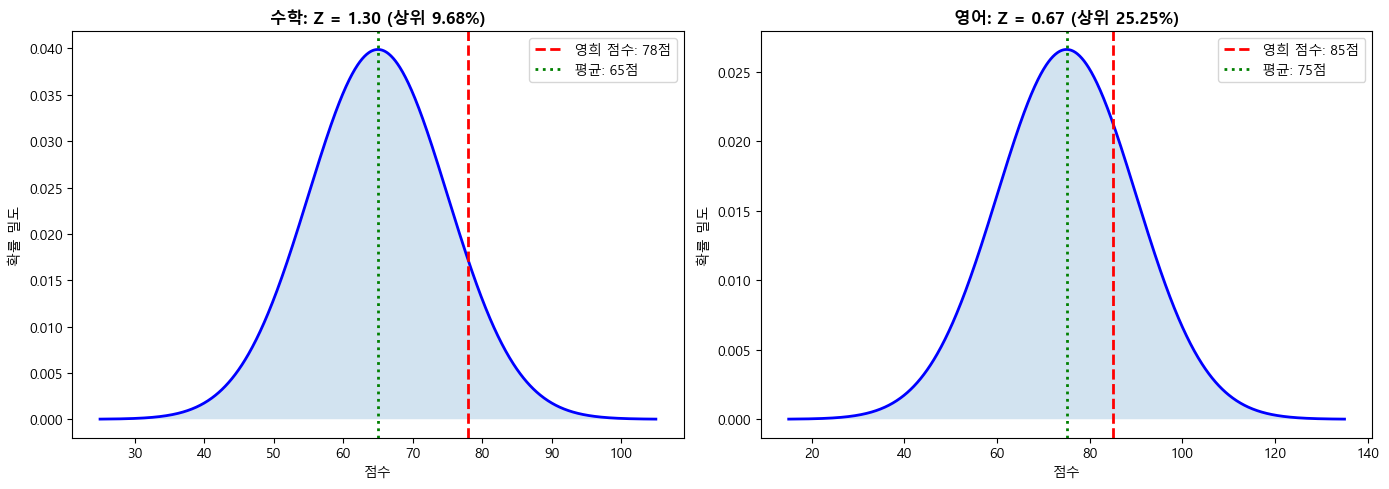

In [46]:
# 시각화: 두 과목 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 왼쪽: 수학 분포
x_math = np.linspace(math_mean - 4*math_std, math_mean + 4*math_std, 1000)
y_math = stats.norm.pdf(x_math, math_mean, math_std)
axes[0].plot(x_math, y_math, 'b-', linewidth=2)
axes[0].fill_between(x_math, y_math, alpha=0.2)
axes[0].axvline(math_score, color='red', linestyle='--', linewidth=2, label=f'영희 점수: {math_score}점')
axes[0].axvline(math_mean, color='green', linestyle=':', linewidth=2, label=f'평균: {math_mean}점')
axes[0].set_xlabel('점수')
axes[0].set_ylabel('확률 밀도')
axes[0].set_title(f'수학: Z = {z_math:.2f} (상위 {top_pct_math:.2f}%)', fontweight='bold')
axes[0].legend()

# 오른쪽: 영어 분포
x_eng = np.linspace(eng_mean - 4*eng_std, eng_mean + 4*eng_std, 1000)
y_eng = stats.norm.pdf(x_eng, eng_mean, eng_std)
axes[1].plot(x_eng, y_eng, 'b-', linewidth=2)
axes[1].fill_between(x_eng, y_eng, alpha=0.2)
axes[1].axvline(eng_score, color='red', linestyle='--', linewidth=2, label=f'영희 점수: {eng_score}점')
axes[1].axvline(eng_mean, color='green', linestyle=':', linewidth=2, label=f'평균: {eng_mean}점')
axes[1].set_xlabel('점수')
axes[1].set_ylabel('확률 밀도')
axes[1].set_title(f'영어: Z = {z_eng:.2f} (상위 {top_pct_eng:.2f}%)', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

---

# 3회차 실습 과제: 추정과 가설검정

## 문제 항목

| 문제     | 주제                 | 핵심 개념                                       |
|----------|----------------------|-------------------------------------------------|
| 문제 1   | 신뢰구간 계산        | 점추정, 구간추정, 신뢰수준, 표본크기 결정        |
| 문제 2   | 단일표본 검정        | 가설 설정, t-검정, p-value 해석, 결론 도출       |
| 문제 3   | 두 그룹 비교         | 독립표본 t-검정, 효과크기, 단일 vs 독립 vs 대응 구분     |

---

## 핵심 공식 정리

### 신뢰구간

| 조건              | 공식                                                             |
|-------------------|------------------------------------------------------------------|
| σ를 아는 경우     | $\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$       |
| σ를 모르는 경우   | $\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$      |
| 필요 표본크기     | $n = \left(\frac{z_{\alpha/2} \cdot \sigma}{E}\right)^2$       |

### 검정통계량

| 검정               | 공식                                                                             |
|--------------------|----------------------------------------------------------------------------------|
| z-검정             | $z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$                                |
| 단일표본 t-검정    | $t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}, \quad df = n - 1$                   |
| 독립표본 t-검정    | $t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_1^2/n_1 + s_2^2/n_2}}$              |
| 대응표본 t-검정    | $t = \frac{\bar{d}}{s_d / \sqrt{n}}, \quad d_i = X_{after} - X_{before}$       |
| Cohen's d          | $d = \frac{|\bar{X}_1 - \bar{X}_2|}{s_{pooled}}$                               |

### scipy.stats 핵심 함수

| 함수                          | 설명                           | 사용 예시                                    |
|-------------------------------|--------------------------------|----------------------------------------------|
| `stats.t.interval()`         | t분포 기반 신뢰구간            | `stats.t.interval(0.95, df, loc, scale)`     |
| `stats.t.ppf()`              | t분포 임계값                   | `stats.t.ppf(0.975, df=29)`                 |
| `stats.ttest_1samp()`        | 단일표본 t-검정                | `stats.ttest_1samp(data, popmean=100)`       |
| `stats.ttest_ind()`          | 독립표본 t-검정                | `stats.ttest_ind(a, b, equal_var=False)`     |
| `stats.ttest_rel()`          | 대응표본 t-검정                | `stats.ttest_rel(after, before)`             |
| `stats.sem()`                | 표준오차 계산                  | `stats.sem(data)`                            |

### 판정 규칙

| p-value 결과  | 판정             | 해석                                          |
|---------------|------------------|-----------------------------------------------|
| p ≤ α         | H0 **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 유의   |
| p > α         | H0 **기각 실패** | "증거 부족, 판단 보류" (H0가 참은 아닙니다!)    |

---

In [47]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("=" * 60)
print("3회차 실습 과제: 추정과 가설검정")
print("=" * 60)

3회차 실습 과제: 추정과 가설검정


---

## 문제 1: 신뢰구간 계산

### 시나리오: 배달 앱 배달 시간 분석

배달 앱 운영팀이 평균 배달 시간을 파악하려 합니다.

40건의 배달 데이터를 수집했습니다.

**주어진 데이터:**

In [48]:
print("\n[문제 1] 배달 앱 배달 시간 분석")
print("=" * 50)

np.random.seed(42)
delivery_times = np.random.normal(loc=35, scale=8, size=40) # 표본 추출
delivery_times = np.round(delivery_times, 1)

print(f"배달 시간 데이터 (n = {len(delivery_times)}건):")
print(delivery_times)


[문제 1] 배달 앱 배달 시간 분석
배달 시간 데이터 (n = 40건):
[39.  33.9 40.2 47.2 33.1 33.1 47.6 41.1 31.2 39.3 31.3 31.3 36.9 19.7
 21.2 30.5 26.9 37.5 27.7 23.7 46.7 33.2 35.5 23.6 30.6 35.9 25.8 38.
 30.2 32.7 30.2 49.8 34.9 26.5 41.6 25.2 36.7 19.3 24.4 36.6]


### 문제 1-1: 점추정

**(a)** 모평균의 점추정값(표본평균)을 구하세요.

**(b)** 모표준편차의 점추정값(표본표준편차, ddof=1)을 구하세요.

**(c)** 표준오차(SE)를 구하세요.

In [49]:
print("\n[문제 1-1] 점추정")
print("-" * 40)

# TODO (a): 표본평균
x_bar = np.mean(delivery_times)

print(f"(a) 표본평균 = {x_bar:.2f}")

# TODO (b): 표본표준편차 (ddof=1)
s = np.std(delivery_times, ddof=1)

print(f"(b) 표본표준편차 = {s:.2f}")

# TODO (c): 표준오차 SE = s / sqrt(n)
n = 40 # 표본의 크기
se = s / np.sqrt(n)

print(f"(c) 표준오차 SE = {se:.2f}")


[문제 1-1] 점추정
----------------------------------------
(a) 표본평균 = 33.25
(b) 표본표준편차 = 7.62
(c) 표준오차 SE = 1.21


### 문제 1-2: 신뢰구간 구하기

**(a)** 95% 신뢰구간을 **수동으로** 계산하세요.

**(b)** `stats.t.interval()`를 사용하여 95% 신뢰구간을 구하세요.

**(c)** 90%, 95%, 99% 신뢰구간을 모두 구하고, 구간 너비를 비교하세요.

> 신뢰수준이 높아지면 구간 너비는 어떻게 변하나요?

In [50]:
print("\n[문제 1-2] 신뢰구간 구하기")
print("-" * 40)

n = len(delivery_times)
alpha = 0.05

# TODO (a): 수동 계산
t_crit = stats.t.ppf(1-alpha/2, df=n-1)  # t 임계값
margin = t_crit * se  # 오차한계 = t_crit * se
ci_low = x_bar - margin  # 하한
ci_high = x_bar + margin  # 상한

print(f"(a) 수동 계산:")
print(f"    t 임계값 (df={n-1}): {t_crit:.2f}")
print(f"    오차한계: ±{margin:.2f}")
print(f"    95% CI: [{ci_low:.2f}, {ci_high:.2f}]")


# TODO (b): scipy.stats 활용
ci_scipy = stats.t.interval(0.95,df=n-1, loc=x_bar, scale=se)  # scipy활용 신뢰 구간

print(f"\n(b) scipy 활용:")
print(f"      95% CI: [{ci_scipy[0]:.2f}, {ci_scipy[1]:.2f}]")


# TODO (c): 세 가지 신뢰수준 너비 비교
print(f"\n(c) 신뢰수준별 비교:")
for confidence in [0.90, 0.95, 0.99]:
    ci = stats.t.interval(confidence, df=n-1, loc=x_bar, scale=se)   
    width = round(ci[1]-ci[0], 2)  
    print(f"     {confidence*100:.0f}% CI: [{ci[0]:.2f}, {ci[1]:.2f}]  (너비: {width})")

print("\n    해석: 신뢰수준이 높아질수록 CI의 범위가 증가한다.")



[문제 1-2] 신뢰구간 구하기
----------------------------------------
(a) 수동 계산:
    t 임계값 (df=39): 2.02
    오차한계: ±2.44
    95% CI: [30.81, 35.68]

(b) scipy 활용:
      95% CI: [30.81, 35.68]

(c) 신뢰수준별 비교:
     90% CI: [31.21, 35.28]  (너비: 4.06)
     95% CI: [30.81, 35.68]  (너비: 4.87)
     99% CI: [29.98, 36.51]  (너비: 6.53)

    해석: 신뢰수준이 높아질수록 CI의 범위가 증가한다.


### 문제 1-3: 표본크기 결정

경영진이 "평균 배달 시간의 **오차한계를 ±1분 이내**로 하고 싶다"고 합니다.

**(a)** 95% 신뢰수준에서 필요한 최소 표본크기를 구하세요.

**(b)** 오차한계를 ±0.5분으로 줄이면 표본크기가 어떻게 변하나요?

In [51]:
print("\n[문제 1-3] 표본크기 결정")
print("-" * 40)

z_95 = 1.96
sigma_est = np.std(delivery_times, ddof=1)  # 표본표준편차를 σ 추정치로 사용

# TODO (a): 오차한계 ±1분
E1 = 1.0
n_required_1 = np.ceil((z_95 * sigma_est / E1) ** 2)  # (z_95 * sigma_est / E1) ** 2 → 올림

print(f"(a) 오차한계 ±{E1}분 → 필요 표본크기: {n_required_1:.0f}건")


# TODO (b): 오차한계 ±0.5분
E2 = 0.5
n_required_2 = np.ceil((z_95 * sigma_est / E2) ** 2)

print(f"(b) 오차한계 ±{E2}분 → 필요 표본크기: {n_required_2:.0f}건")

# print(f"\n    해석: ...")
print(f"\n    해석: 오차한계를 1분에서 0.5분으로 줄이면 표본의 크기는 약 4배 커진다.")


[문제 1-3] 표본크기 결정
----------------------------------------
(a) 오차한계 ±1.0분 → 필요 표본크기: 224건
(b) 오차한계 ±0.5분 → 필요 표본크기: 893건

    해석: 오차한계를 1분에서 0.5분으로 줄이면 표본의 크기는 약 4배 커진다.


---

## 문제 2: 단일표본 t-검정

### 시나리오: 음료 자판기 용량 검사

자판기 제조사는 커피 한 잔의 용량이 **200ml**이라고 주장합니다.

소비자 보호원이 무작위로 20잔을 측정하여 주장을 검증합니다.

**주어진 데이터:**

In [52]:
print("\n[문제 2] 자판기 용량 검사")
print("=" * 50)

np.random.seed(123)
coffee_ml = np.random.normal(loc=196, scale=6, size=20)
coffee_ml = np.round(coffee_ml, 1)

print(f"측정 데이터 (n = {len(coffee_ml)}잔):")
print(coffee_ml)
print(f"\n표본평균: {np.mean(coffee_ml):.2f}ml")
print(f"표본표준편차: {np.std(coffee_ml, ddof=1):.2f}ml")



[문제 2] 자판기 용량 검사
측정 데이터 (n = 20잔):
[189.5 202.  197.7 187.  192.5 205.9 181.4 193.4 203.6 190.8 191.9 195.4
 204.9 192.2 193.3 193.4 209.2 209.1 202.  198.3]

표본평균: 196.68ml
표본표준편차: 7.54ml


### 문제 2-1: 가설검정 5단계

유의수준 α = 0.05에서, 자판기 용량이 200ml에 미달하는지 검정하세요.

**(a)** 가설을 설정하세요.

**(b)** `stats.ttest_1samp()`으로 검정통계량과 p-value를 구하세요.

**(c)** 결론을 내리세요. (기각 또는 기각 실패, 그 의미)

**(d)** 95% 신뢰구간(양측)을 구하고, 구간에 200이 포함되는지 확인하세요. 그래서 검정 결과와 일관되는지 확인 하세요.

In [53]:
print("\n[문제 2-1] 가설검정 5단계")
print("-" * 40)

mu_0 = 200  # 제조사 주장
alpha = 0.05

# TODO (a): 가설 설정
print("[1단계] 가설 설정")
print(f"  H0: mu = {mu_0}  (주장대로 200ml)")
# print(f"  H1: ...")   # 방향을 결정하세요
# print(f"  검정 유형: ...")
print(f"  H1: 자판기의 용량은 200 mL 미만이다.")
print(f"  검정 유형: 단일 표본 t-검정, 하한 단측을 사용할 예정")

print(f"\n[2단계] 유의수준: alpha = {alpha}")

# TODO (b): 검정 실행
n = len(coffee_ml) #표본의 크기
x_bar = np.mean(coffee_ml) #표본평균
s = np.std(coffee_ml, ddof=1) #
se = s / np.sqrt(n) #표준오차

t_stat = (x_bar - mu_0) / se
p_value_two = stats.ttest_1samp(coffee_ml, mu_0)[1]  # stats.ttest_1samp 결과 (양측)
p_value = p_value_two / 2  # 단측이라면 /2, 양측이라면 그대로

print(f"\n[3단계] 검정통계량")
print(f"  t-통계량: {t_stat:.3f}")

print(f"\n[4단계] p-value")
print(f"  p-value (양측): {p_value_two:.3f}")
print(f"  p-value (사용할 값): {p_value:.3f}")

# TODO (c): 결론
print(f"\n[5단계] 결론")
if p_value <= alpha:
    print(f'p-value({p_value:.3f}) <= alpha({alpha:.3f})이므로 귀무가설(H0)을 기각합니다.')
else:
    print(f'p-value({p_value:.3f}) > alpha({alpha:.3f})이므로 귀무가설(H0) 기각을 보류합니다.')   

# TODO (d): [참고] 95% 신뢰구간
ci_95 = stats.t.interval(0.95, df=n-1, loc=x_bar, scale=se)

print(f"\n[참고] 95% 신뢰구간: {ci_95}")



[문제 2-1] 가설검정 5단계
----------------------------------------
[1단계] 가설 설정
  H0: mu = 200  (주장대로 200ml)
  H1: 자판기의 용량은 200 mL 미만이다.
  검정 유형: 단일 표본 t-검정, 하한 단측을 사용할 예정

[2단계] 유의수준: alpha = 0.05

[3단계] 검정통계량
  t-통계량: -1.972

[4단계] p-value
  p-value (양측): 0.063
  p-value (사용할 값): 0.032

[5단계] 결론
p-value(0.032) <= alpha(0.050)이므로 귀무가설(H0)을 기각합니다.

[참고] 95% 신뢰구간: (193.14643747367217, 200.20356252632786)


### 문제 2-2: p-value 해석 연습

다음 각 상황에서 올바른 해석을 고르세요.

**(a)** p-value = 0.03, α = 0.05 일 때 올바른 해석은?

1. "H0가 참일 확률이 3%이다"

2. "H0가 참일 때, 이 결과가 나올 확률이 3%이다"

3. "H1이 참일 확률이 97%이다"

**(b)** p-value = 0.12, α = 0.05 일 때, "H0가 참이다"라고 결론 내릴 수 있나요?

**(c)** 같은 데이터로 α = 0.01과 α = 0.10을 적용하면 결론이 달라질 수 있는 예를 설명하세요.

In [54]:
print("\n[문제 2-2] p-value 해석 연습")
print("-" * 40)

# TODO (a): 올바른 해석 번호
p_value = 0.03
alpha = 0.05

answer_a = 2  # 1, 2, 또는 3

print(f"(a) 올바른 해석: {answer_a}번")
print(f"   {answer_a}번을 선택한 이유: 귀무가설이 사실일 때, 내가 선택한 20잔의 평균이 200 mL보다 낮을 확률이 {p_value*100}%라는 의미이기 때문이다.")


# TODO (b)
print(f"\n(b) p=0.12일 때 'H0가 참이다'라고 할 수 있나요?")
print(f"    답변: 그렇지 않다.")
print(f"    이유: p-value가 유의수준보다 크다면 귀무가설 기각을 보류하는 것일 뿐, 귀무가설이 참이라고 해석할 수는 없다.")


# TODO (c)
print(f"\n(c) 유의수준에 따른 결론 차이 예시:")

# 유의수준이 0.01인 경우
assumed_alpha_1 = 0.01
if p_value <= assumed_alpha_1:
    answer_1 = '귀무가설 기각'
else:
    answer_1 = '귀무가설 기각 보류'    

# 유의수준이 0.1인 경우
assumed_alpha_2 = 0.1
if p_value <= assumed_alpha_2:
    answer_2 = '귀무가설 기각'
else:
    answer_2 = '귀무가설 기각 보류'    

print(f"    (1) 유의수준이 {assumed_alpha_1}인 경우, {answer_1}")
print(f"    (2) 유의수준이 {assumed_alpha_2}인 경우, {answer_2}")

print(f'\n    해석: p-value가 {p_value}일 때, 유의수준이 {assumed_alpha_1}이라면 귀무가설 기각을 보류하지만,')
print(f'\n         p-value가 {p_value}일 때, 유의수준이 {assumed_alpha_2}이라면 귀무가설을 기각한다.')
print(f'\n         p-value가 동일하더라도 유의수준에 따라 귀무가설의 기각은 수용되거나 보류된다.')


[문제 2-2] p-value 해석 연습
----------------------------------------
(a) 올바른 해석: 2번
   2번을 선택한 이유: 귀무가설이 사실일 때, 내가 선택한 20잔의 평균이 200 mL보다 낮을 확률이 3.0%라는 의미이기 때문이다.

(b) p=0.12일 때 'H0가 참이다'라고 할 수 있나요?
    답변: 그렇지 않다.
    이유: p-value가 유의수준보다 크다면 귀무가설 기각을 보류하는 것일 뿐, 귀무가설이 참이라고 해석할 수는 없다.

(c) 유의수준에 따른 결론 차이 예시:
    (1) 유의수준이 0.01인 경우, 귀무가설 기각 보류
    (2) 유의수준이 0.1인 경우, 귀무가설 기각

    해석: p-value가 0.03일 때, 유의수준이 0.01이라면 귀무가설 기각을 보류하지만,

         p-value가 0.03일 때, 유의수준이 0.1이라면 귀무가설을 기각한다.

         p-value가 동일하더라도 유의수준에 따라 귀무가설의 기각은 수용되거나 보류된다.


---

## 문제 3: 독립표본 t-검정

### 시나리오: 온라인 vs 오프라인 강의 효과 비교

교육 기관에서 온라인 강의와 오프라인 강의의 학습 효과를 비교합니다.

두 그룹은 서로 다른 학생들로 구성되어 있습니다 (독립표본).

**주어진 데이터:**

In [55]:
print("\n[문제 3] 온라인 vs 오프라인 강의 효과 비교")
print("=" * 50)

np.random.seed(42)
online = np.random.normal(loc=75, scale=12, size=35)   # 온라인 강의
offline = np.random.normal(loc=80, scale=10, size=30)   # 오프라인 강의

print(f"온라인 강의 (n={len(online)}): 평균={np.mean(online):.2f}, SD={np.std(online, ddof=1):.2f}")
print(f"오프라인 강의 (n={len(offline)}): 평균={np.mean(offline):.2f}, SD={np.std(offline, ddof=1):.2f}")


[문제 3] 온라인 vs 오프라인 강의 효과 비교
온라인 강의 (n=35): 평균=73.41, SD=11.18
오프라인 강의 (n=30): 평균=77.74, SD=8.72


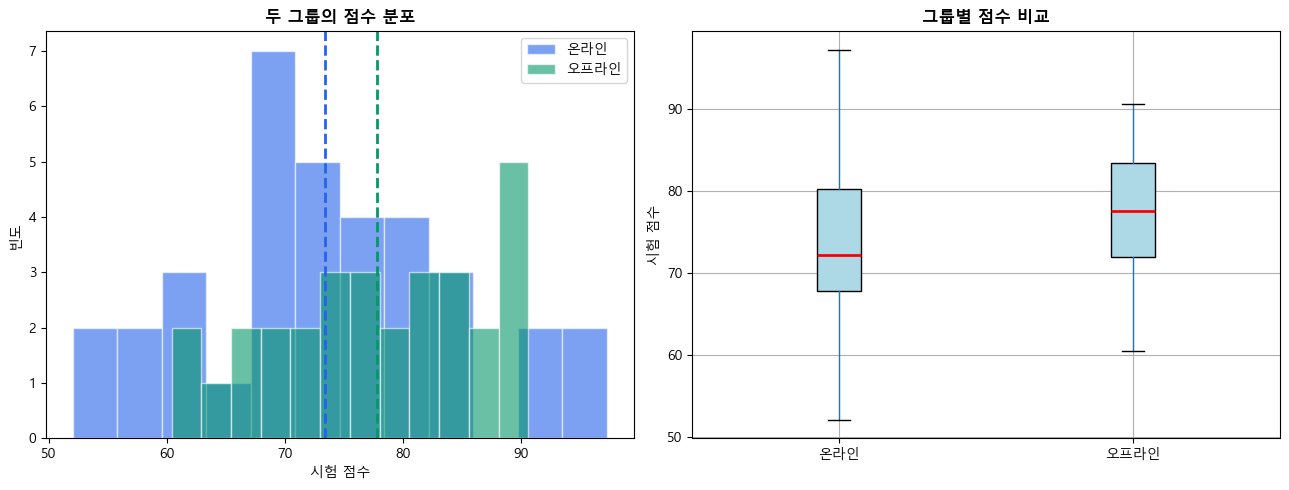

In [56]:
# 시각화: 두 그룹 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# 히스토그램 비교
axes[0].hist(online, bins=12, alpha=0.6, color='#2563EB', edgecolor='white', label='온라인')
axes[0].hist(offline, bins=12, alpha=0.6, color='#059669', edgecolor='white', label='오프라인')
axes[0].axvline(np.mean(online), color='#2563EB', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(offline), color='#059669', linestyle='--', linewidth=2)
axes[0].set_xlabel('시험 점수')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 그룹의 점수 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)

# 박스플롯
data_box = pd.DataFrame({
    '온라인': pd.Series(online),
    '오프라인': pd.Series(offline)
})
data_box.boxplot(ax=axes[1], patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('시험 점수')
axes[1].set_title(f'그룹별 점수 비교', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 문제 3-1: 독립표본 t-검정 수행

**(a)** 가설을 설정하세요.

> 두 강의 방식의 효과에 차이가 있는지 (양측검정)

**(b)** `stats.ttest_ind()`로 검정하세요.

> `equal_var=False`를 사용하여 Welch's t-test를 수행하세요 (등분산 가정 없이).

**(c)** α = 0.05에서 결론을 내리세요.

In [57]:
print("\n[문제 3-1] 독립표본 t-검정")
print("-" * 40)

alpha = 0.05

# TODO (a): 가설 설정
print(f'\n (a) 가설 설정')
print(f' - 귀무가설(H0): 온/오프라인 강의 방식의 효과는 동일하다.')
print(f' - 대립가설(H1): 온/오프라인 강의 방식의 효과는 다르다.')

# TODO (b): Welch's t-test
t_stat, p_value = stats.ttest_ind(online, offline, equal_var = False)

print(f"\n (b) Welch's t 검정")
print(f' - p-value: {p_value:.4f}')

# TODO (c): 결론
print(f'\n (c) 결론')
if p_value <= alpha:
    print(f' - p-value({p_value:.4f}) <= alpha({alpha:.4f})이므로 귀무가설(H0)을 기각합니다.')
else:
    print(f' - p-value({p_value:.4f}) > alpha({alpha:.4f})이므로 귀무가설(H0) 기각을 보류합니다.')    


[문제 3-1] 독립표본 t-검정
----------------------------------------

 (a) 가설 설정
 - 귀무가설(H0): 온/오프라인 강의 방식의 효과는 동일하다.
 - 대립가설(H1): 온/오프라인 강의 방식의 효과는 다르다.

 (b) Welch's t 검정
 - p-value: 0.0848

 (c) 결론
 - p-value(0.0848) > alpha(0.0500)이므로 귀무가설(H0) 기각을 보류합니다.


### 문제 3-2: 효과크기 (Cohen's d)

**(a)** Cohen's d를 계산하세요.

> 공식: $d = \frac{|\bar{X}_1 - \bar{X}_2|}{s_{pooled}}$
>
> $s_{pooled} = \sqrt{\frac{(n_1-1) s_1^2 + (n_2-1) s_2^2}{n_1 + n_2 - 2}}$

**(b)** 효과크기를 해석하세요. (작은/중간/큰 효과)

| d 값  | 해석      |
|-------|-----------|
| 0.2   | 작은 효과 |
| 0.5   | 중간 효과 |
| 0.8   | 큰 효과   |

**(c)** p-value 결과와 효과크기를 종합하여 최종 판단을 내리세요.

In [58]:
print("\n[문제 3-2] 효과크기 (Cohen's d)")
print("-" * 40)

n1, n2 = len(online), len(offline)
s1 = np.std(online, ddof=1)
s2 = np.std(offline, ddof=1)

# TODO (a): Cohen's d 계산 (online 학습 그룹과 offline 학습 그룹은 독립된 그룹이라고 가정)
var1 = np.var(online, ddof=1)
var2 = np.var(offline, ddof=1)
s_pooled = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
d_1 = abs(np.mean(online) - np.mean(offline)) / s_pooled

print(f"\n(a) 효과크기 계산")
print(f'  효과크기: {d_1:.3f}')

# TODO (b): 해석
print(f"\n(b) 해석")
if d_1 < 0.2:
    print(f"  효과크기는 {d_1:.3f}로 두 집단간의 차이가 무시할 수 있는 수준임")
elif d_1 < 0.5:
    print(f"  효과크기는 {d_1:.3f}로 두 집단간의 차이가 눈에 잘 띄지 않는다고 할 수 있음")
elif d_1 < 0.8:
    print(f"  효과크기는 {d_1:.3f}로 두 집단간의 차이가 어느 정도 보인다고 할 수 있음")
else:
    print(f"  효과크기는 {d_1:.3f}로 두 집단간의 차이가 확실히 보인다고 할 수 있음")

# TODO (c): 종합 판단
print(f"\n(c) 종합 판단")
print(f"  유의수준이 {alpha:.3f}일 때, p-value는 {p_value:.3f}로 통계적으로 유의미한 차이를 보였다고 해석하기 어렵다.")
print(f"  또한, 효과크기는 {d_1:.3f}로 두 집단 간의 차이가 크다고 해석하기 어려운 부분이 있다.")
print(f"  따라서 online 학습과 offline 학습의 효과가 다르다고 해석하기 어렵다.")


[문제 3-2] 효과크기 (Cohen's d)
----------------------------------------

(a) 효과크기 계산
  효과크기: 0.428

(b) 해석
  효과크기는 0.428로 두 집단간의 차이가 눈에 잘 띄지 않는다고 할 수 있음

(c) 종합 판단
  유의수준이 0.050일 때, p-value는 0.085로 통계적으로 유의미한 차이를 보였다고 해석하기 어렵다.
  또한, 효과크기는 0.428로 두 집단 간의 차이가 크다고 해석하기 어려운 부분이 있다.
  따라서 online 학습과 offline 학습의 효과가 다르다고 해석하기 어렵다.


### 문제 3-3: 적절한 t검정 선택

아래 각 상황에서 어느 검정을 사용해야 하는지 고르고, 그 이유를 간단히 적어보세요.

**보기**: 단일표본 t-검정 / 독립표본 t-검정(Student's) / 독립표본 t-검정(Welch's) / 대응표본 t-검정

**(a)** 제과업체에서 과자 1봉지의 규격 중량은 150g입니다. 생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.

**(b)** A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교 (두 반의 분산이 비슷함)

**(c)** A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데, 두 공장의 분산이 같은지 모릅니다.

**(d)** 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증

**(e)** 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면 어떤 문제가 생기나요?

In [59]:
print("\n[문제 3-3] 적절한 t검정 선택")
print("-" * 40)
print("보기: 단일표본 t-검정 / 독립표본 t-검정(Student's) /")
print("      독립표본 t-검정(Welch's) / 대응표본 t-검정")

# TODO (a)
print("\n(a) 제과업체에서 과자 1봉지의 규격 중량은 150g입니다.")
print("    생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.")
print(f"    사용할 검정: 단일표본 t-검정")
print(f"    이유: 샘플링한 과자 12봉지의 평균 중량을 기준값인 150g과 비교하고자 하는 상황이기 때문이다.")

# TODO (b)
print("\n(b) A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교")
print("    (두 반의 분산이 비슷함)")
print(f"    사용할 검정: 독립표본 t-검정(Student's)")
print(f"    이유: 두 반은 서로 독립된 집단이고, 문제에서 분산이 비슷하다고 했다.")
print(f"        따라서 두 반의 분산 차이에 대한 Levene검정을 한 뒤, 두 집단의 분산이 우연히 생길 수 있는 정도의 차이라면")
print(f"        두 집단의 분산이 약간 다르더라도 등분산성을 만족한다고 가정하고 위 방법으로 검정을 수행할 것이다.")

# TODO (c)
print("\n(c) A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데,")
print("    두 공장의 분산이 같은지 모릅니다.")
print(f"    사용할 검정: 독립표본 t-검정(Welch's)")
print(f"    이유: 두 공장은 독립적인 집단이지만, 분산의 차이를 아예 모르는 상황이기 때문에")
print(f"    등분산성을 만족하지 않더라도 이를 보정해서 수행할 수 있는 위 검정 방법을 수행할 것이다.")

# TODO (d)
print("\n(d) 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증")
print(f"    사용할 검정: 대응표본 t-검정")
print(f"    이유: 같은 환자군에게 치료를 받기 전후 데이터를 비교하고 싶은 것이므로,")
print(f"         각각의 데이터는 1:1 대응관계가 성립되고, 혈압 변화를 측정해 치료 효과를 검정하고 싶은 것이기 때문이다.")

# TODO (e)
print("\n(e) 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면")
print("    어떤 문제가 생기나요?")
print(f"    문제점: 원래 선택했던 대응표본 t-검정에서는 개개인의 혈압 차이라는 노이즈를 제거하고 동일한 환자의 혈압 변화량을 관찰했었다.")
print(f"         그러나 독립표본 t-검정으로 수행하게 되면 사람마다 다른 혈압을 고려하지 못한 채 개개인의 특성에 따른 혈압을 모두 오차로 분류해")
print(f"         잘못된 결론을 내릴 가능성이 더욱 상승한다.")


[문제 3-3] 적절한 t검정 선택
----------------------------------------
보기: 단일표본 t-검정 / 독립표본 t-검정(Student's) /
      독립표본 t-검정(Welch's) / 대응표본 t-검정

(a) 제과업체에서 과자 1봉지의 규격 중량은 150g입니다.
    생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.
    사용할 검정: 단일표본 t-검정
    이유: 샘플링한 과자 12봉지의 평균 중량을 기준값인 150g과 비교하고자 하는 상황이기 때문이다.

(b) A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교
    (두 반의 분산이 비슷함)
    사용할 검정: 독립표본 t-검정(Student's)
    이유: 두 반은 서로 독립된 집단이고, 문제에서 분산이 비슷하다고 했다.
        따라서 두 반의 분산 차이에 대한 Levene검정을 한 뒤, 두 집단의 분산이 우연히 생길 수 있는 정도의 차이라면
        두 집단의 분산이 약간 다르더라도 등분산성을 만족한다고 가정하고 위 방법으로 검정을 수행할 것이다.

(c) A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데,
    두 공장의 분산이 같은지 모릅니다.
    사용할 검정: 독립표본 t-검정(Welch's)
    이유: 두 공장은 독립적인 집단이지만, 분산의 차이를 아예 모르는 상황이기 때문에
    등분산성을 만족하지 않더라도 이를 보정해서 수행할 수 있는 위 검정 방법을 수행할 것이다.

(d) 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증
    사용할 검정: 대응표본 t-검정
    이유: 같은 환자군에게 치료를 받기 전후 데이터를 비교하고 싶은 것이므로,
         각각의 데이터는 1:1 대응관계가 성립되고, 혈압 변화를 측정해 치료 효과를 검정하고 싶은 것이기 때문이다.

(e) 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면
    어떤 문제

---

## 문제 4: 대응표본 t-검정과 검정력

### 시나리오: 영어 학습 앱 효과 검증

교육 회사가 새로운 영어 학습 앱의 효과를 검증합니다.

15명의 학생이 앱 사용 전후에 영어 시험을 치렀습니다.

**주어진 데이터:**

In [60]:
print("\n[문제 4] 영어 학습 앱 효과 검증")
print("=" * 50)

np.random.seed(42)
n_students = 15

before_scores = np.random.normal(loc=65, scale=10, size=n_students)
improvement = np.random.normal(loc=5, scale=6, size=n_students)
after_scores = before_scores + improvement

before_scores = np.round(before_scores, 1)
after_scores = np.round(after_scores, 1)

print(f"{'학생':>4} {'사전':>8} {'사후':>8} {'변화':>8}")
print("-" * 32)
for i in range(n_students):
    diff = after_scores[i] - before_scores[i]
    print(f"  {i+1:>2d}   {before_scores[i]:>6.1f}   {after_scores[i]:>6.1f}   {diff:>+6.1f}")

print(f"\n사전 평균: {np.mean(before_scores):.2f}")
print(f"사후 평균: {np.mean(after_scores):.2f}")
print(f"차이 평균: {np.mean(after_scores - before_scores):.2f}")



[문제 4] 영어 학습 앱 효과 검증
  학생       사전       사후       변화
--------------------------------
   1     70.0     71.6     +1.6
   2     63.6     62.5     -1.1
   3     71.5     78.4     +6.9
   4     80.2     79.8     -0.4
   5     62.7     59.2     -3.5
   6     62.7     76.5    +13.8
   7     80.8     84.4     +3.6
   8     72.7     78.1     +5.4
   9     60.3     56.8     -3.5
  10     70.4     72.2     +1.8
  11     60.4     66.0     +5.6
  12     60.3     58.4     -1.9
  13     67.4     74.7     +7.3
  14     45.9     47.3     +1.4
  15     47.8     51.0     +3.2

사전 평균: 65.11
사후 평균: 67.79
차이 평균: 2.68


### 문제 4-1: 대응표본 t-검정

**(a)** 가설을 설정하세요.

**(b)** 검정을 수행하세요.

**(c)** α = 0.05에서 결론을 내리세요.

**(d)** 차이(d = 사후 - 사전)의 95% 신뢰구간을 구하세요.

In [61]:
print("\n[문제 4-1] 대응표본 t-검정")
print("-" * 40)

alpha = 0.05
differences = after_scores - before_scores

# TODO (a): 가설 설정
print(f'\n (a) 가설 설정')
print(f' - 귀무가설(H0): 새로운 학습앱을 사용하기 전후 성적 변화는 없다.')
print(f' - 대립가설(H1): 새로운 학습앱을 사용하기 전후 성적 변화는 있다.')

# TODO (b): 대응표본 t-검정
print(f'\n (b) 대응표본 t-검정')
t_stat, p_value = stats.ttest_rel(after_scores, before_scores)
print(f'  t-통계량: {t_stat:.4f}')
print(f'  p-value: {p_value:.4f}')

# TODO (c): 결론
print(f'\n (c) 결론')
if p_value <= alpha:
    print(f'   p-value({p_value:.4f}) <= alpha({alpha:.4f})이므로 귀무가설(H0)을 기각합니다.')
    print(f'   즉, 새로운 학습앱 사용 전후의 성적 변화는 통계적으로 유의미하다고 해석할 수 있다.')
else:
    print(f'   p-value({p_value:.4f}) > alpha({alpha:.4f})이므로 귀무가설(H0) 기각을 보류합니다.')   
    print(f'   즉, 새로운 학습앱 사용 전후의 성적 변화가 있다고 해석하기 어렵다.')
    
# TODO (d): 차이의 95% 신뢰구간
diff = after_scores - before_scores #성적 변화량
n = len(diff) #표본의 크기

mean_diff = np.mean(diff) #표본평균
sem_diff = stats.sem(diff) #표본오차(SEM)

ci_low, ci_high = stats.t.interval(0.95, df = n-1, loc = mean_diff, scale = sem_diff)

print(f'\n (d) 차이의 95% 신뢰구간')
print(f"      표본 집단의 평균 성적 변화량: {mean_diff:.3f}점")
print(f"      95% 신뢰구간: [{ci_low:.3f}, {ci_high:.3f}]")


[문제 4-1] 대응표본 t-검정
----------------------------------------

 (a) 가설 설정
 - 귀무가설(H0): 새로운 학습앱을 사용하기 전후 성적 변화는 없다.
 - 대립가설(H1): 새로운 학습앱을 사용하기 전후 성적 변화는 있다.

 (b) 대응표본 t-검정
  t-통계량: 2.2254
  p-value: 0.0430

 (c) 결론
   p-value(0.0430) <= alpha(0.0500)이므로 귀무가설(H0)을 기각합니다.
   즉, 새로운 학습앱 사용 전후의 성적 변화는 통계적으로 유의미하다고 해석할 수 있다.

 (d) 차이의 95% 신뢰구간
      표본 집단의 평균 성적 변화량: 2.680점
      95% 신뢰구간: [0.097, 5.263]


### 문제 4-2 (도전!) : 검정력 분석 

앱의 실제 효과가 **평균 5점 향상**이라고 가정합니다.

현재 표본(n=15)으로 이 효과를 탐지할 수 있는 확률(검정력)은 얼마인가요?

> 힌트: `TTestPower.solve_power()`를 사용하세요. effect_size에는 Cohen's d = mu_d / s_d 를 넣어야 합니다.

**(a)** 현재 표본크기(n=15)에서의 검정력을 계산하세요.

**(b)** 80% 검정력을 달성하려면 최소 몇 명이 필요한가요? 

**(c)** 검정력 곡선을 그리세요. (x축: 표본크기 n, y축: 검정력 Power)
> 힌트: n을 5~100 범위로 변화시키며 각각의 검정력을 계산하고, 80% 기준선도 함께 표시하세요.


In [63]:
print("\n[문제 4-2] 검정력 분석")
print("-" * 40)

# 힌트로 주어진 TTestPower.solve_power()를 사용하기 위해 필요한 라이브러리 호출
from statsmodels.stats.power import TTestPower

# 가정
mu_d = 5           # 가정한 평균 차이 (점)

#differences = after_scores - before_scores
s_d = np.std(differences, ddof=1)  # 차이의 표준편차

n = 15 #표본의 크기
# alpha = 0.05

print(f"가정: 실제 효과 = {mu_d}점 향상")
print(f"차이의 표준편차 sd = {s_d:.2f}")


# TODO (a): 현재 검정력 (n=15)
# 효과크기 계산
cohens_d = mu_d / s_d #효과크기 = 제시된 평균 점수 변화량/표준편차

ttest_analysis = TTestPower() #TTestPower는 클래스이기 때문에 바로 쓰지 않고 객체를 만들어 사용해야 한다고 함

analysis_1 = ttest_analysis.solve_power(
		effect_size = cohens_d, # 효과크기
		nobs = n, # 표본의 크기
		alpha = alpha, # 유의수준
		power=None, # 목표 검정력 -> 현재 검정력을 알고싶으므로 설정 안함
		alternative='larger' # 검정 방향: 효과가 있었다는 것을 검증하기 위해 설정
)

print(f'\n (a) 현재 검정력 (n=15): {analysis_1:.3f}')

# TODO (b): 80% 검정력에 필요한 표본크기
required_n = ttest_analysis.solve_power(
		effect_size = cohens_d, # 효과크기
		nobs = None, # 표본의 크기 -> 현재 알고 싶은 값이므로 None으로 설정
		alpha = alpha, # 유의수준
		power = 0.8, # 목표 검정력
		alternative='larger' # 검정 방향: 효과가 있었다는 것을 검증하기 위해 설정
)

print(f'\n (b) 80% 검정력에 필요한 표본크기: {np.ceil(required_n):.0f}')


[문제 4-2] 검정력 분석
----------------------------------------
가정: 실제 효과 = 5점 향상
차이의 표준편차 sd = 4.66

 (a) 현재 검정력 (n=15): 0.989

 (b) 80% 검정력에 필요한 표본크기: 7


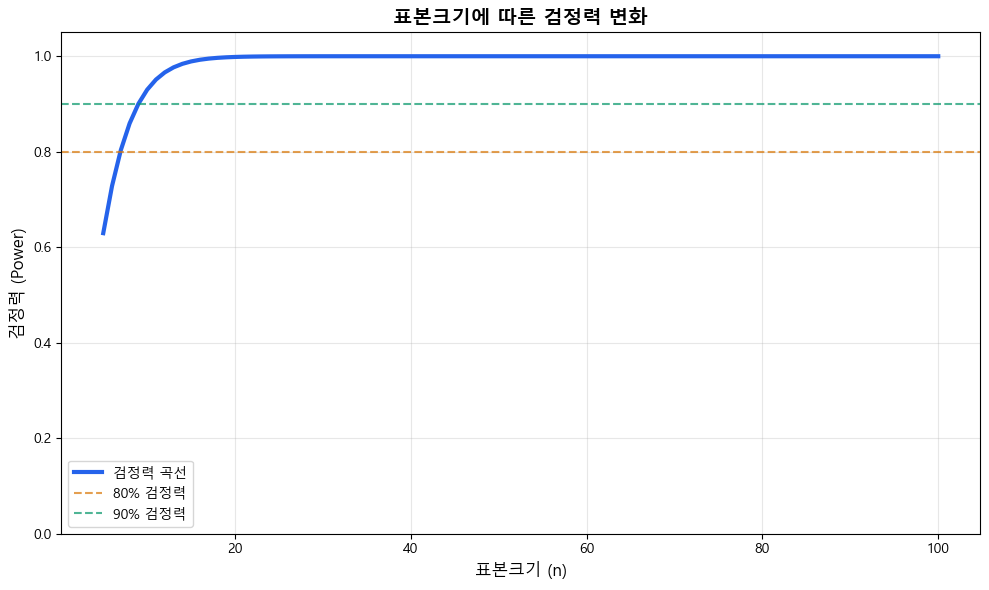

In [64]:
# TODO (c): 검정력 곡선 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# TODO: n_range에 대해 검정력을 계산하고 plot 하세요
# (1) 표본 크기의 범위를 설정
n_range = np.arange(5, 101)
powers = []

# (2) 검정력을 계산하고, powers에 추가
for n in n_range:
    power = ttest_analysis.solve_power(
        effect_size = cohens_d,
        nobs = n,
        alpha = alpha,
        power=None,
        alternative='larger'
    )
    powers.append(power)

# (3) 검정력 곡선 그리기
# ax.plot(): 데이터를 점 또는 선으로 연결해 시각화하는 도구      
ax.plot(n_range, powers, color='#2563EB', linewidth=3, label='검정력 곡선')

# (4) 80% 기준선 그리기 및 그래프 꾸미기
ax.axhline(0.80, color='#D97706', linestyle='--', alpha=0.7, label='80% 검정력')
ax.axhline(0.90, color='#059669', linestyle='--', alpha=0.7, label='90% 검정력')
ax.set_xlabel('표본크기 (n)', fontsize=12)
ax.set_ylabel('검정력 (Power)', fontsize=12)
ax.set_title('표본크기에 따른 검정력 변화', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()